# Import Libraries

In [32]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# segment image


image 1/1 d:\collage\CS 23-24\4\sem 1\Computer vision\Tasks\ObjectSehmentation\img2.jpeg: 480x640 3 persons, 3 chairs, 1 potted plant, 1 laptop, 87.2ms
Speed: 3.0ms preprocess, 87.2ms inference, 8.6ms postprocess per image at shape (1, 3, 480, 640)


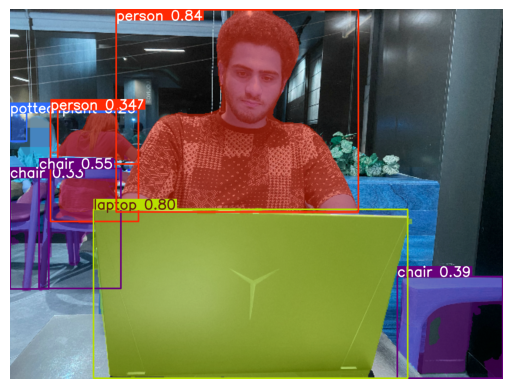

In [33]:
model = YOLO('yolov8n-seg.pt')
result = model("img2.jpeg")

res_img = result[0].plot()
plt.imshow(res_img)
plt.axis('off')
plt.show()

# Open the video file

In [34]:
video_source = "car.mp4"
cap = cv2.VideoCapture(video_source)



# Get video properties

In [35]:
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define video writer

In [36]:
output_file = "Processed_Video.mp4"
out = cv2.VideoWriter(
    output_file,
    cv2.VideoWriter_fourcc(*"mp4v"),
    fps,
    (frame_width, frame_height)
)

# Perform object detection
# Write and display the frame

In [37]:
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model.predict(frame)
    processed_frame = results[0].plot()

    out.write(processed_frame)
    cv2.imshow("YOLO Detection", processed_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


0: 384x640 17 cars, 6 buss, 78.7ms
Speed: 2.0ms preprocess, 78.7ms inference, 12.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 cars, 6 buss, 75.4ms
Speed: 2.4ms preprocess, 75.4ms inference, 15.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 19 cars, 6 buss, 79.2ms
Speed: 1.0ms preprocess, 79.2ms inference, 14.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19 cars, 5 buss, 70.7ms
Speed: 2.0ms preprocess, 70.7ms inference, 13.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 20 cars, 4 buss, 1 truck, 67.4ms
Speed: 2.0ms preprocess, 67.4ms inference, 13.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 18 cars, 5 buss, 1 truck, 69.5ms
Speed: 2.1ms preprocess, 69.5ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19 cars, 4 buss, 1 truck, 65.9ms
Speed: 2.0ms preprocess, 65.9ms inference, 14.2ms postprocess per image at shape (

# release

In [38]:
cap.release()
out.release()
cv2.destroyAllWindows()